In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

from quantum.trainer import MNIST01QAETrainer

2025-11-18 22:01:27.894603: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-18 22:01:27.917791: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-18 22:01:28.438680: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
trainer = MNIST01QAETrainer()
trainer.train(num_train=200, max_iterations=500, random_seed=42)
print(f"Training completed in {trainer.qae_model.training_time:.2f} seconds.")

2025-11-18 22:01:29.898109: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
0it [00:00, ?it/s]2025-11-18 22:01:29.972235: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
12457it [00:03, 3277.94it/s]2025-11-18 22:01:33.843183: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
12665it [00:03, 3256.81it/s]
1932it [00:00, 3259.79it/s]2025-11-18 22:01:34.506144: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2115it [00:00, 3218.58it/s]


Training completed in 318.84 seconds.


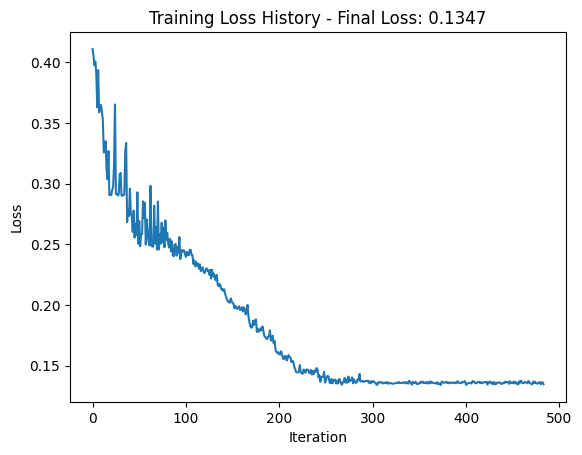

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=trainer.qae_model.training_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title(f"Training Loss History - Final Loss: {trainer.qae_model.training_history[-1]:.4f}")
plt.show()

In [10]:
# predict
originals, predictions = trainer.predict(num_test=10, return_original=True)

12665it [00:03, 3288.33it/s]
1971it [00:00, 3336.65it/s]2025-11-18 22:08:01.864314: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2115it [00:00, 3284.81it/s]
100%|██████████| 10/10 [00:00<00:00, 275.30it/s]


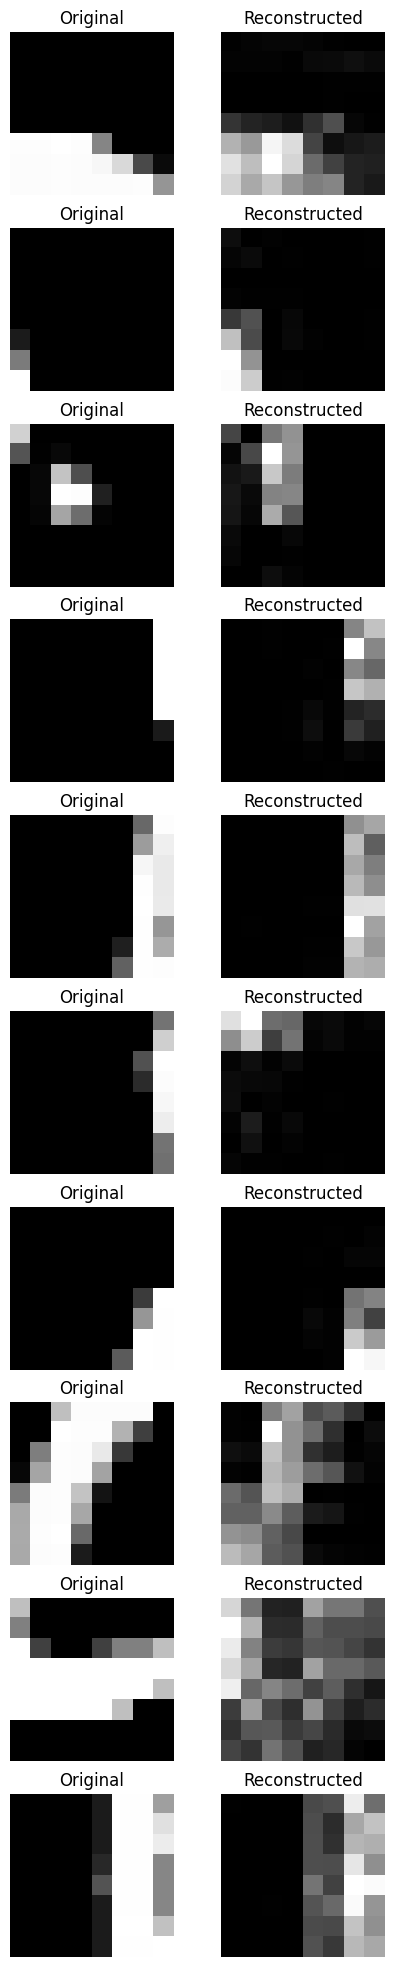

In [18]:
# plot results
fig, axes = plt.subplots(10, 2, figsize=(5, 25))
for i in range(10):
    axes[i, 0].imshow(originals[i].reshape(8, 8), cmap='gray')
    axes[i, 0].set_title("Original")
    axes[i, 0].axis('off')
    axes[i, 1].imshow(predictions[i].reshape(8, 8), cmap='gray')
    axes[i, 1].set_title("Reconstructed")
    axes[i, 1].axis('off')